In [ ]:
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import datetime
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./BreadBasket_DMS.csv')

In [ ]:
df.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [ ]:
#lowercase values
df['Item'] = df['Item'].str.lower()

In [ ]:
#check none values
x = df['Item'] == "none"
print(x.value_counts())

False    20507
True       786
Name: Item, dtype: int64


In [ ]:
#drop none values
df = df.drop(df[df.Item == 'none'].index)

In [ ]:
#check number of unique items in the dataset
len(df['Item'].unique())

94

In [ ]:
df['Item'].value_counts()

coffee            5471
bread             3325
tea               1435
cake              1025
pastry             856
                  ... 
polenta              1
adjustment           1
gift voucher         1
olum & polenta       1
chicken sand         1
Name: Item, Length: 94, dtype: int64

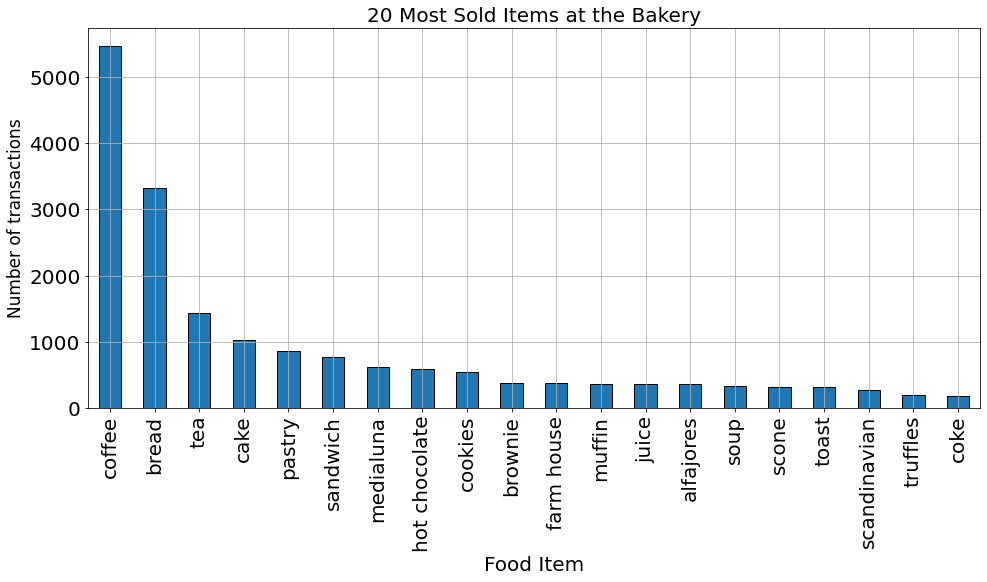

In [ ]:
#Plot top 20 best selling items on graph
fig, ax=plt.subplots(figsize=(16,7))
df['Item'].value_counts().sort_values(ascending=False).head(20).plot.bar(width=0.5,edgecolor='k',align='center',linewidth=1)
plt.xlabel('Food Item',fontsize=20)
plt.ylabel('Number of transactions',fontsize=17)
ax.tick_params(labelsize=20)
plt.title('20 Most Sold Items at the Bakery',fontsize=20)
plt.grid()
plt.ioff()

In [ ]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [ ]:
#encode values to pass into apriori function
hot_encoded_df = df.groupby(['Transaction', 'Item'])['Item'].count().unstack().reset_index().fillna(0).set_index('Transaction')

In [ ]:
hot_encoded_df.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,bowl nic pitt,bread,bread pudding,brioche and salami,brownie,cake,caramel bites,cherry me dried fruit,chicken sand,chicken stew,chimichurri oil,chocolates,christmas common,coffee,coffee granules,coke,cookies,crepes,crisps,drinking chocolate spoons,duck egg,dulce de leche,eggs,ella's kitchen pouches,empanadas,extra salami or feta,fairy doors,farm house,focaccia,frittata,...,lemon and coconut,medialuna,mighty protein,mineral water,mortimer,muesli,muffin,my-5 fruit shoot,nomad bag,olum & polenta,panatone,pastry,pick and mix bowls,pintxos,polenta,postcard,raspberry shortbread sandwich,raw bars,salad,sandwich,scandinavian,scone,siblings,smoothies,soup,spanish brunch,spread,tacos/fajita,tartine,tea,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#convert float to int
def encode_units(x):
    if x <= 0:
        return 0
    if x >= 1:
        return 1
hot_encoded_df = hot_encoded_df.applymap(encode_units)

In [ ]:
#get frequent items with min support
frequent_itemsets = apriori(hot_encoded_df, min_support=0.01, use_colnames=True)

In [ ]:
frequent_itemsets

,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(coffee, toast)"
57,0.014369,"(tea, sandwich)"
58,0.010037,"(cake, coffee, bread)"
59,0.011199,"(coffee, bread, pastry)"


In [ ]:
#get rules based on confidence score
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.5)
rules.head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648
1,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664
2,(cookies),(coffee),0.054411,0.478394,0.028209,0.518447,1.083723,0.002179,1.083174
3,(hot chocolate),(coffee),0.058320,0.478394,0.029583,0.507246,1.060311,0.001683,1.058553
4,(juice),(coffee),0.038563,0.478394,0.020602,0.534247,1.116750,0.002154,1.119919
5,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871
6,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682
7,(sandwich),(coffee),0.071844,0.478394,0.038246,0.532353,1.112792,0.003877,1.115384
8,(scone),(coffee),0.034548,0.478394,0.018067,0.522936,1.093107,0.001539,1.093366
9,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235
